STOCK MARKET PREDICTION 

In [39]:
import pandas_datareader as pdr
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy

In [40]:
df=pdr.get_data_tiingo('GOOG', api_key='b20d59406df270b4e2a3646965fc4a4ef9bae6d5')


C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [41]:
df.to_csv('GOOG.csv')

In [42]:
df=pd.read_csv('GOOG.csv')

In [43]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2017-02-09 00:00:00+00:00,809.56,810.660,804.54,809.51,990391,809.56,810.660,804.54,809.51,990391,0.0,1.0
1,GOOG,2017-02-10 00:00:00+00:00,813.67,815.250,809.78,811.70,1134976,813.67,815.250,809.78,811.70,1134976,0.0,1.0
2,GOOG,2017-02-13 00:00:00+00:00,819.24,820.959,815.49,816.00,1213324,819.24,820.959,815.49,816.00,1213324,0.0,1.0
3,GOOG,2017-02-14 00:00:00+00:00,820.45,823.000,816.00,819.00,1054732,820.45,823.000,816.00,819.00,1054732,0.0,1.0
4,GOOG,2017-02-15 00:00:00+00:00,818.98,823.000,818.47,819.36,1313617,818.98,823.000,818.47,819.36,1313617,0.0,1.0


In [44]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2022-02-01 00:00:00+00:00,2757.57,2764.0000,2691.3645,2756.70,2560160,2757.57,2764.0000,2691.3645,2756.70,2560160,0.0,1.0
1254,GOOG,2022-02-02 00:00:00+00:00,2960.73,3042.0000,2911.1501,3037.27,4487538,2960.73,3042.0000,2911.1501,3037.27,4487538,0.0,1.0
1255,GOOG,2022-02-03 00:00:00+00:00,2853.01,2982.3544,2844.1000,2905.90,2846507,2853.01,2982.3544,2844.1000,2905.90,2846507,0.0,1.0
1256,GOOG,2022-02-04 00:00:00+00:00,2860.32,2890.7050,2796.3500,2860.34,2461220,2860.32,2890.7050,2796.3500,2860.34,2461220,0.0,1.0
1257,GOOG,2022-02-07 00:00:00+00:00,2778.76,2876.9299,2773.9800,2874.18,2230537,2778.76,2876.9299,2773.9800,2874.18,2230537,0.0,1.0


In [45]:
df1=df.reset_index()['close']

In [46]:
df1.shape

(1258,)

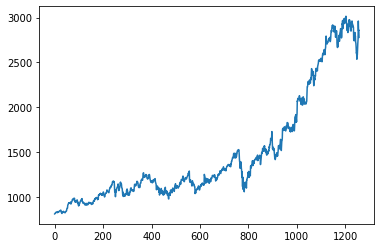

In [47]:
#Visualization
plt.plot(df1)

In [48]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [49]:
df1.shape

(1258, 1)

In [50]:
#Splitting into train and test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [51]:
training_size,test_size

(817, 441)

In [52]:
#converting array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)   


In [53]:
#Reshaping
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)


In [54]:
X_train.shape,y_train.shape

((716, 100), (716,))

In [55]:
X_test.shape,y_test.shape

((340, 100), (340,))

In [56]:
print(X_train)

[[0.         0.00186427 0.00439078 ... 0.04909236 0.04498281 0.04043327]
 [0.00186427 0.00439078 0.00493963 ... 0.04498281 0.04043327 0.04633452]
 [0.00439078 0.00493963 0.00427285 ... 0.04043327 0.04633452 0.04405748]
 ...
 [0.24271757 0.24288086 0.24526222 ... 0.24453194 0.23180866 0.2346164 ]
 [0.24288086 0.24526222 0.24415546 ... 0.23180866 0.2346164  0.24564324]
 [0.24526222 0.24415546 0.25020638 ... 0.2346164  0.24564324 0.24391505]]


In [57]:
#Creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam



In [58]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
          optimizer='adam')

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 10s 355ms/step - loss: 0.0060 - val_loss: 0.1584
Epoch 2/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0018 - val_loss: 0.0848
Epoch 3/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0011 - val_loss: 0.0296
Epoch 4/100
12/12 [==============================] - 2s 138ms/step - loss: 7.6109e-04 - val_loss: 0.0155
Epoch 5/100
12/12 [==============================] - 2s 149ms/step - loss: 6.2139e-04 - val_loss: 0.0074
Epoch 6/100
12/12 [==============================] - 2s 145ms/step - loss: 5.9108e-04 - val_loss: 0.0081
Epoch 7/100
12/12 [==============================] - 2s 135ms/step - loss: 5.5918e-04 - val_loss: 0.0107
Epoch 8/100
12/12 [==============================] - 2s 135ms/step - loss: 5.3532e-04 - val_loss: 0.0080
Epoch 9/100
12/12 [==============================] - 2s 134ms/step - loss: 5.1964e-04 - val_loss: 0.0087
Epoch 10/100
12/12 [==============================] - 2s 135ms/ste

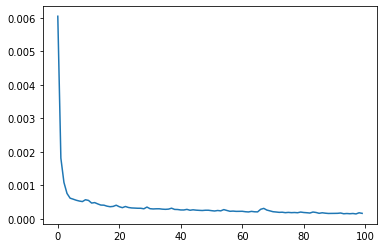

In [61]:
loss=model.history.history['loss']
plt.plot(loss)

In [62]:
#Predict
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [63]:
#Transforming back to origna form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

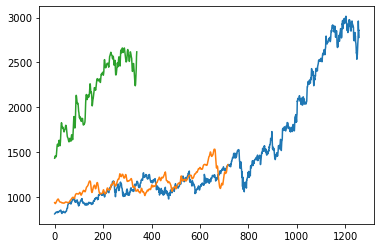

In [64]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict)
plt.plot(test_predict)

In [65]:
test=np.vstack((train_predict,test_predict))

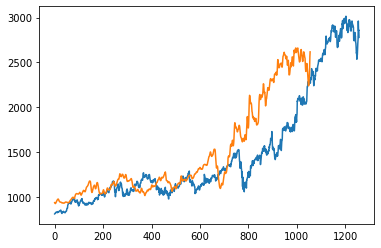

In [66]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(test)

In [67]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


1154.275583186619

In [68]:
math.sqrt(mean_squared_error(y_test,test_predict))

2192.416656994637

In [69]:
len(test_data)

441

In [70]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [71]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [72]:
#Predictions for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print (x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
        #print(temp_input)
    else:
        x_input=x_input.reshape((1, n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1 

print(lst_output)           

[0.79165334]
101
1 day input [0.91612614 0.89393183 0.89964257 0.91136341 0.91941922 0.92673567
 0.91646633 0.86823126 0.85314476 0.84175504 0.87075777 0.84628643
 0.86816776 0.87884533 0.89546044 0.90335749 0.89239415 0.87303027
 0.88379857 0.91565893 0.91804483 0.92970671 0.93752211 0.92475801
 0.92807377 0.89037567 0.8917183  0.8998739  0.96115884 0.95845089
 0.97787827 0.93708666 0.95603778 0.96444739 0.98162042 0.98668251
 0.98768495 0.98675055 0.9629596  0.96406637 0.99035208 0.98801608
 0.98518566 0.98505865 1.         0.99313714 0.96706462 0.96414802
 0.96378968 0.9283051  0.95831481 0.92509367 0.91752774 0.93710934
 0.92571509 0.93729078 0.97575546 0.98196061 0.97638595 0.98154784
 0.96367174 0.94794114 0.96969546 0.94674366 0.92827789 0.92463554
 0.94113725 0.96588981 0.96764522 0.97600494 0.96134481 0.96185737
 0.9573033  0.94530123 0.94888462 0.94291533 0.88156236 0.88063249
 0.87567472 0.889913   0.90300823 0.91779989 0.89496603 0.90091263
 0.86919741 0.86340503 0.84394136

In [73]:
len(df1)

1258

In [74]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

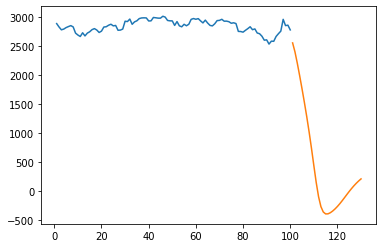

In [75]:
plt.plot(plot_new,scaler.inverse_transform(df1[1158:]))
plt.plot(plot_pred,scaler.inverse_transform(lst_output))

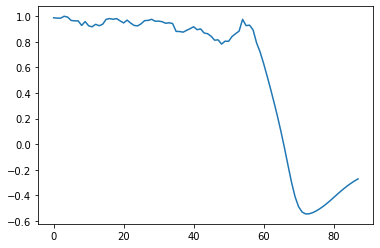

In [76]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

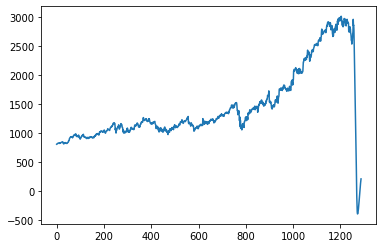

In [77]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)